After background 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import powerlaw
import ccHistStuff as cc
from iminuit import Minuit

In [6]:
mass = np.loadtxt("mass.txt")


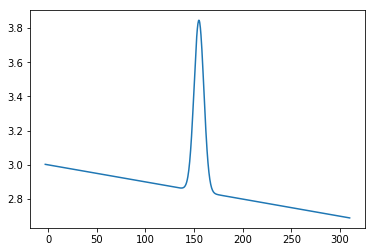

In [7]:
# initializing global paramters
a=-1/1000
b=3
mu=155
sigma=5

# creation of numpy array for x values
x_values=np.linspace(-3, 310, 1000)

# background function definition 
def b_pdf(x, a, b):
    return a*x+b

# signal guassian definition
def s_pdf(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# background and signal functions
def y(b_pdf, s_pdf):
    return b_pdf(x_values,a,b)+s_pdf(x_values,mu,sigma)

# plot dem nutter butters!
plt.plot(x_values, y(b_pdf, s_pdf))
plt.show()

In [4]:
def NLL(S,B,alpha): 
    # alpha=0  ---> use b_pdf
    # alpha=1  ---> use b1_pdf
    # alpha=-1 ---> use b2_pdf
    # (and smoothly interpolates vs. alpha)
    if alpha>0:
        new_b_pdf = b_pdf + alpha*(b1_pdf-b_pdf)
    else:
        new_b_pdf = b_pdf - alpha*(b2_pdf-b_pdf)    
    # should be already normalized, but make sure
    new_b_pdf = new_b_pdf / new_b_pdf.sum()  
    temp = d * np.log(S*s_pdf + B*new_b_pdf)
    return S + B - temp.sum() + alpha*alpha/2.

# Setup the fitter.  S, B, alpha are the initial guesses
# print_level=0 --> suppress print of intermediate information 
# errordef = 0.5   because for NLL 1 sigma errors are  from
#                  NLL-NLL(at minimum) = 0.5
# error_S, error_B, alpha: are initial steps to look for minimum
# We fix alpha=0 if shapeSyst=False


m = Minuit(NLL, S=10., B=500., alpha=0., print_level=1,
           errordef=0.5, error_S=1.0, error_B=1.0, error_alpha=0.1,
           fix_alpha=(not shapeSyst))

# Run the fitter
m.migrad()
m.minos()
m.print_param()

# Profile scan of the fitted function (NLL).
# At each FIXED value of S, fit again for B,
# extract the NLL at the minimum, subtract 
# the NLL at the GLOBAL minimum, and plot it
xxx, yyy, _ = m.mnprofile('S', subtract_min=True, bins=100, bound=(0,60))

# m.mnprofile does all the work... 
# Now we just plot the results
# deltaNLL = 0.5 (2, 4.5 ) corresponds to 1 (2, 3) sigma

fig3, ax3 = plt.subplots()
ax3.plot(xxx,yyy,linestyle='solid', color='b')
ax3.set_xlim(min(xxx), max(xxx))
ax3.set_ylim(0.)
ax3.set_xlabel('S')
ax3.set_ylabel('deltaNLL')
ax3.plot([min(xxx), max(xxx)], [0.5, 0.5], linestyle='dashed', color='red')
ax3.plot([min(xxx), max(xxx)], [2.0, 2.0], linestyle='dashed', color='red')
ax3.plot([min(xxx), max(xxx)], [4.5, 4.5], linestyle='dashed', color='red')
fig3.show()

NameError: name 'shapeSyst' is not defined

Chi squared fits: d_i is a data point of N numbers and there is an uncertainty to each one: sigma.

Chi squared is something that we don't have to do for this problem, but maybe if I understand this method of fitting, the method of Negative Log likelihood fitting will make some more sense. 


The formula for a chi squared fit allows us to do a few things:
1. We want to see small deviations 
2. We want to give more importance to more precise measurements(smaller sig)
3. but why the square? good reason, fucking conventional?
4. this assumes that the d_i are not correlated
5. w/o sig in the denom or sig const. this would be a least squared fit(do I know this??)

the value of chi^2 at the min is meaningful b/c if it's too large we have a bad hypothesis,

if too small too good a fit says: overestimated uncertainties or got lucky

Rule of thumb: expect chi^2 to be about ndof(que is esto??) for well behaved problem... gottem

uncertainty on the alpha_i

inverse covariance matrix 

1. numpy.polyfit.

- fitting to polynomials only
- the covariance calc is broken in np (early)

2. scipy.optimize.curve_fit

3. iminuit

4. Will write our own simple cas, to see how it works
- also best for special cases where speed matters



Weve been stresseing over bpdf and spdf. 



To do an unbinned fit: an 


We want to do an extended NLL as outlined in the notes he placed online.

the idea is to dig out the signal for some interesting but rare process out of a sea of background.

1. select events with patterns of final state particles/kinematics according to what you signal should look like to distinguish it from background

2. most likely this selection will give you both signal and background events

3. you then have to 
- decide whether you have a signal or not
- if so, estimate how 'strong' your signal is

NLL is the same as chi^2 within a factor of 1/2

this will be something we do with minuit

1. we define the NLL function. this is done for us!!


